# **MetaboTandem**

# D. Statistical Analysis

# 2. Differential analysis

This Notebook allows to merge and rearrange the SIRIUS output into dataframes

## 2.1 Loading libraries

In [19]:
library(tidyverse)
source('functions_statistics.R')

### Setting output variables

In [2]:
figures_dir <- file.path('..', '..', '..', 'figures')
tables_dir <- file.path('..', '..', '..', 'tables')

## 2.2 User Inputs Required <====
Provide the following variables:
- **norm_feature_table_file:** Path of the file with the normalized feature intensities
- **metadata_file:** Path of the file with the sample information

In [11]:
norm_feature_table_file <- file.path(tables_dir, 'normalized_feature_abundances.csv')
metadata_file <- '../../../data/metadata.csv'

## 2.3 Opening data tables

In [4]:
norm_abundances <- read_csv(norm_feature_table_file)
metadata <- read_csv(metadata_file)

Rows: 213 Columns: 9
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): FeatureID
dbl (8): RP_S41, RP_S42, RP_S43, RP_S44, RP_S57, RP_S58, RP_S59, RP_S60

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8 Columns: 3
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): FileName, SampleID, treatment

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 2.4 Calculate differential expression

### 2.4.1 Get sample lists

In [7]:
control_samples <- get_samples(metadata, 'treatment', 'CTR')
treatment_samples <- get_samples(metadata, 'treatment', 'WP')

### 2.4.2 Get differential expression table

In [9]:
diff_expression <- get_diff_table(norm_abundances, control.sample_list = control_samples,
                                 treatment.sample_list = treatment_samples, log2_transformed = TRUE)
head(diff_expression)

,FeatureID,control_means,treatment_means,log2FC,pval,pval.adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,29.99424,30.36299,0.3687470,7.854953e-05,0.001673105
2,2,29.20741,28.88054,-0.3268645,2.914655e-04,0.004138810
3,3,28.48591,28.70204,0.2161367,9.444114e-02,0.236658383
4,4,28.09344,27.97831,-0.1151292,1.192384e-02,0.061945818
5,5,28.46142,28.26901,-0.1924096,5.038125e-04,0.005961781
6,6,29.57852,29.92273,0.3442118,5.592754e-04,0.006211370


### 2.4.3 Plot Volcano

Saving 6.67 x 6.67 in image



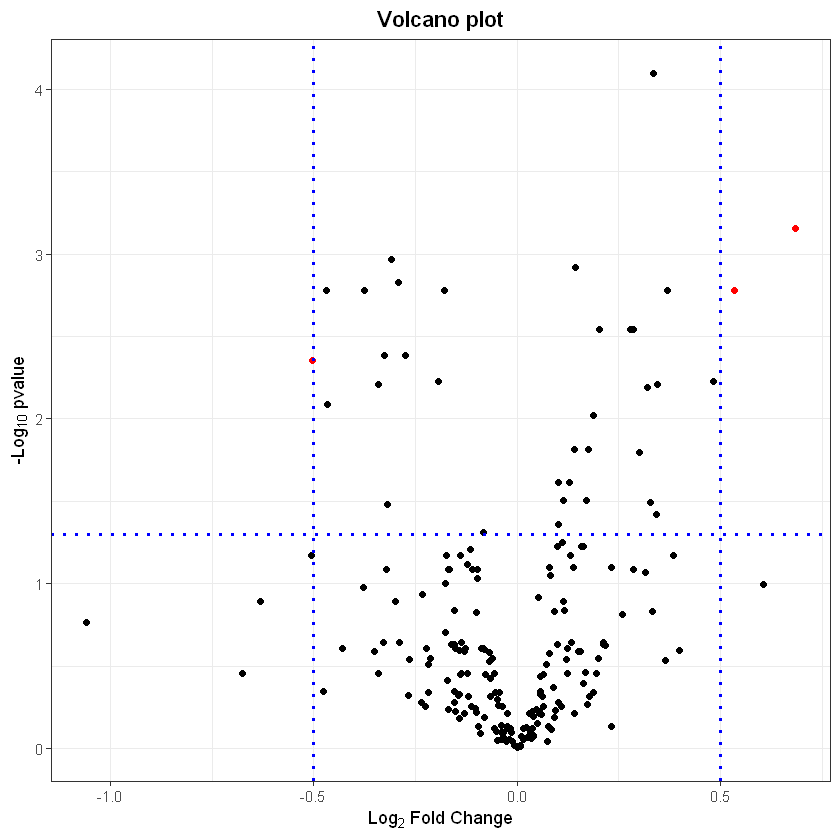

In [21]:
volcano <- plot_volcano(diff_expression, log2FC, pval.adj, log2FC.threshold = 0.5, pval.threshold = 0.05, 
                        save.figure = file.path(figures_dir, 'volcano_plot.png'))